In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import cv2
import numpy as np

In [2]:
leaf_classes = [
    'Target_Spot',
    'Late_blight',
    'Mosaic_virus',
    'Leaf_Mold',
    'Bacterial_spot',
    'Early_blight',
    'Healthy',
    'Yellow_Leaf_Curl_Virus',
    'Two-spotted_spider_mite',
    'Septoria_leaf_spot'
]

model = load_model('kai_model/model.h5', compile=False)

In [3]:
model.compile()

img_path = "uploads/fcda5137-4f0a-4734-89a5-13d5bd119942___Matt.S_CG 7550.JPG"
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
data = np.array([img])
result = model.predict(data)

1/1 [==============================] - 0s 248ms/step


In [5]:
# To get confidence scores for each class with class labels:
class_confidence_scores = dict(zip(leaf_classes, result[0]))
class_confidence_scores

{'Target_Spot': 0.0,
 'Late_blight': 0.0,
 'Mosaic_virus': 0.0,
 'Leaf_Mold': 0.0,
 'Bacterial_spot': 0.0,
 'Early_blight': 0.0,
 'Healthy': 0.0,
 'Yellow_Leaf_Curl_Virus': 0.0,
 'Two-spotted_spider_mite': 0.0,
 'Septoria_leaf_spot': 1.0}

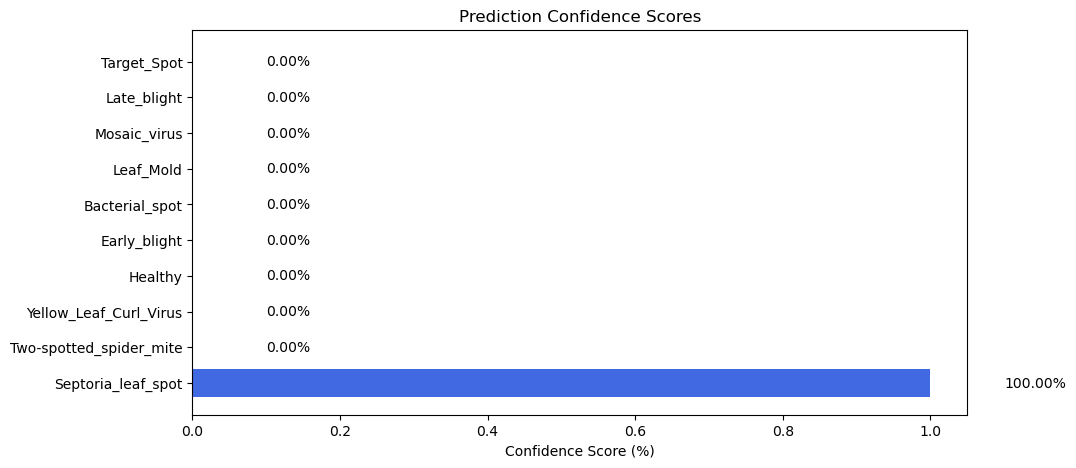

In [8]:
import matplotlib.pyplot as plt

# Extract class labels and confidence scores
class_labels = list(class_confidence_scores.keys())
confidence_scores = list(class_confidence_scores.values())

# Calculate percentages
total_confidence = sum(confidence_scores)
percentages = [score / total_confidence * 100 for score in confidence_scores]

# Create a bar plot
plt.figure(figsize=(10, 5))
bars = plt.barh(class_labels, confidence_scores, color='royalblue')

# Add percentages as text on the bars
for bar, percent in zip(bars, percentages):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{percent:.2f}%', va='center')

plt.xlabel('Confidence Score (%)')  # Update the x-axis label
plt.title('Prediction Confidence Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest confidence at the top
plt.show()


In [2]:
import matplotlib.pyplot as plt

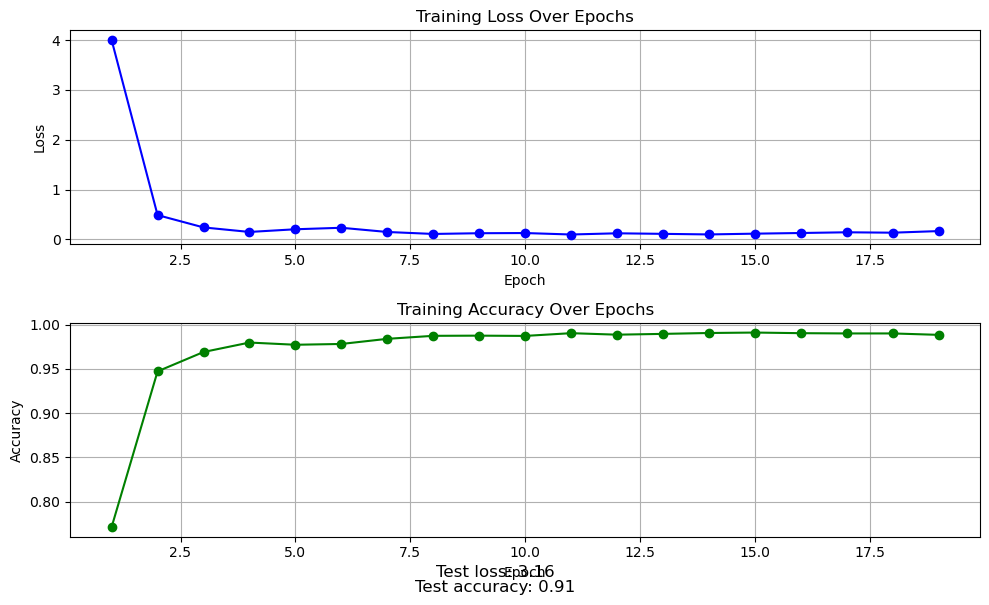

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'training_history.csv'
df = pd.read_csv(file_path, sep=';')

# Extract data
epochs = df['Epoch']
loss = df['Loss']
accuracy = df['Accuracy']

# Create plots
plt.figure(figsize=(10, 6))

# Plot Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='g')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Add test loss and test accuracy lines
plt.figtext(0.5, 0.03, "Test loss: 3.16", fontsize=12, ha="center")
plt.figtext(0.5, 0.005, "Test accuracy: 0.91", fontsize=12, ha="center")

plt.tight_layout()

# Save the plot as an image
plt.savefig('training_plot.png')

plt.show()


In [ ]:
string = "Tomato___Early_blight"

print(string.split("___")[1])